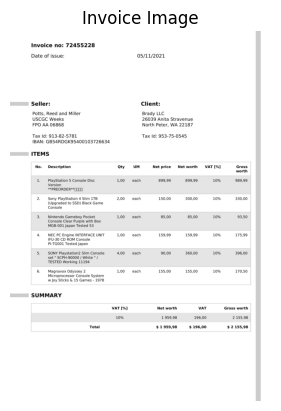

In [3]:
import matplotlib.pyplot as plt
image_path = "image (1).jpg"
from PIL import Image
image = Image.open(image_path)

# Display inline in Kaggle notebook
plt.imshow(image)
plt.axis('off')
plt.title("Invoice Image")
plt.show()

In [4]:
from transformers import DonutProcessor, VisionEncoderDecoderModel

processor = DonutProcessor.from_pretrained("katanaml-org/invoices-donut-model-v1")
model = VisionEncoderDecoderModel.from_pretrained("katanaml-org/invoices-donut-model-v1")

c:\Users\acer\Desktop\DONUT\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
c:\Users\acer\Desktop\DONUT\env\lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\acer\.cache\huggingface\hub\models--katanaml-org--invoices-donut-model-v1. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activat

In [6]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

VisionEncoderDecoderModel(
  (encoder): DonutSwinModel(
    (embeddings): DonutSwinEmbeddings(
      (patch_embeddings): DonutSwinPatchEmbeddings(
        (projection): Conv2d(3, 128, kernel_size=(4, 4), stride=(4, 4))
      )
      (norm): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): DonutSwinEncoder(
      (layers): ModuleList(
        (0): DonutSwinStage(
          (blocks): ModuleList(
            (0): DonutSwinLayer(
              (layernorm_before): LayerNorm((128,), eps=1e-05, elementwise_affine=True)
              (attention): DonutSwinAttention(
                (self): DonutSwinSelfAttention(
                  (query): Linear(in_features=128, out_features=128, bias=True)
                  (key): Linear(in_features=128, out_features=128, bias=True)
                  (value): Linear(in_features=128, out_features=128, bias=True)
                  (dropout): Dropout(p=0.0, inplace=False)
                )

In [7]:
def process_document(image):
    # prepare encoder inputs
    pixel_values = processor(image, return_tensors="pt").pixel_values

    # prepare decoder inputs
    task_prompt = "<s_cord-v2>"
    decoder_input_ids = processor.tokenizer(task_prompt, add_special_tokens=False, return_tensors="pt").input_ids

    # generate answer
    outputs = model.generate(
        pixel_values.to(device),
        decoder_input_ids=decoder_input_ids.to(device),
        max_length=model.decoder.config.max_position_embeddings,
        early_stopping=True,
        pad_token_id=processor.tokenizer.pad_token_id,
        eos_token_id=processor.tokenizer.eos_token_id,
        use_cache=True,
        num_beams=1,
        bad_words_ids=[[processor.tokenizer.unk_token_id]],
        return_dict_in_generate=True,
    )

    # postprocess
    sequence = processor.batch_decode(outputs.sequences)[0]
    sequence = sequence.replace(processor.tokenizer.eos_token, "").replace(processor.tokenizer.pad_token, "")
    sequence = re.sub(r"<.*?>", "", sequence, count=1).strip()  # remove first task start token

    return processor.token2json(sequence)

In [8]:
result = process_document(image)
print(result)

The following generation flags are not valid and may be ignored: ['early_stopping']. Set `TRANSFORMERS_VERBOSITY=info` for more details.


{'header': {'invoice_no': '72455228', 'invoice_date': '05/11/2021', 'seller': 'Potts, Reed and Miller USCGC Weeks FPO AA 06868', 'client': 'Brady LLC 26039 Anita Stravenue North Peter, WA 22187', 'seller_tax_id': '913-82-5781', 'client_tax_id': '953-75-0545', 'iban': 'GB54RDGK95400103726634'}, 'items': [{'item_desc': 'PlayStation 5 Console Disc Version "PREORDER"', 'item_qty': '1,00', 'item_net_price': '899,99', 'item_net_worth': '899,99', 'item_vat': '10%', 'item_gross_worth': '989,99'}, {'item_desc': 'Sony PlayStation 4 Slim 1TB (Upgraded to SSD) Black Game Console', 'item_qty': '2,00', 'item_net_price': '150,00', 'item_net_worth': '300,00', 'item_vat': '10%', 'item_gross_worth': '330,00'}, {'item_desc': 'Nintendo Gameboy Pocket Console Clear Purple with Box MGB-001 Japan Tested 53', 'item_qty': '1,00', 'item_net_price': '85,00', 'item_net_worth': '85,00', 'item_vat': '10%', 'item_gross_worth': '93,50'}, {'item_desc': 'NEC PC Engine INTERFACE UNIT IFU-30 CD ROM Console PI-TG001 Teste

In [1]:
import transformers
print(transformers.__version__)

c:\Users\acer\Desktop\DONUT\env\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


4.53.2
